## Лабораторна робота 4. **REGRESSION** 📈

# Опис вибірки "Motorbike Ambulance Calls"


Аварії за участю мотоциклів та відповідні виклики швидкої допомоги сильно залежать від екологічних та сезонних умов, таких як погодні умови, опади, день тижня, сезон, година дня тощо. Дані збирались протягом двох років щогодини та потім співвідносилися з відповідною погодою та сезонністю.

Основні характеристики вибірки `motorbike_ambulance_calls.csv`:

              - index: record index
              - date : date
              - season : season (1:springer, 2:summer, 3:fall, 4:winter)
              - yr : year (0: 2011, 1:2012)
              - mnth : month ( 1 to 12)
              - hr : hour (0 to 23)
              - holiday : whether day is holiday or not
              - weekday : day of the week
              - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
              -  weathersit :
                      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
                      - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                      - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                      - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
              - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
              - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
              - hum: Normalized humidity. The values are divided to 100 (max)
              - windspeed: Normalized wind speed. The values are divided to 67 (max)
              - cnt: count of total ambulance calls

## Імпорт необхідних бібліотек та завантаження даних

**Завдання 1** підготовка даних до опрацювання

1. завантажте вибірку `motorbike_ambulance_calls.csv`;   
2. підключіть необхідні бібліотеки;  
3. вивести основну статистичну інформацію по числовим змінним;  
4. окремо вивести максимальні та мінімальні значення по всім змінним;  
5. вивести розмірність датасету;

In [23]:
import pandas as pd
import numpy as np
import scipy as sc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid", {"axes.facecolor": ".9"})
sns.set_context("paper",  font_scale=1.2)

In [24]:
def get_data(data_path: str):
  data = pd.read_csv(data_path)
  return data

In [25]:
data = get_data(data_path="motorbike_ambulance_calls.csv")
print(data.info())
print("\n","Розмірність датасету:", data.shape)
print("\n max:", data[data.columns].max())
print("\n min:", data[data.columns].min())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB
None

 Розмірність датасету: (17379, 15)

 max: index          17379
date          9/9/12
season        winter
yr                 1


**Завдання 2** перевірити типи даних та перевірте кількість даних по кожній змінній.

In [26]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       17379 non-null  int64  
 1   date        17379 non-null  object 
 2   season      17379 non-null  object 
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 2.0+ MB
None


**Завдання 3** пепевірте всі змінні на наявність пропусків.

In [27]:
print(data.isna().sum())

index         0
date          0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64


**Висновки з 1-3 завдання (детальні)**



1. бачимо скільки в нас даних і якого вони типу, розмірність нашого датасету, максимальні і мінімальні значення.
2. бачимо скільки в нас даних в кожній колонці, її тип даних.
3. бачимо, що пропусків в нас ніде немає.



**Завдання 4** перетворіть змінну `date` в **date type**. Визначте часові межі датасету.

In [28]:
def tranform_date(df: pd.DataFrame, date_col_name: str):
  df[date_col_name] = pd.to_datetime(df[date_col_name])
  return df
  
data = tranform_date(data, 'date')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   index       17379 non-null  int64         
 1   date        17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(9), object(1)
memory usage: 2.

In [29]:
def get_time_limits(df: pd.DataFrame, date_col_name: str):
  first_day = df[date_col_name].min()
  last_day = df[date_col_name].max()
  print(f"First day of dataset - {first_day}.\n Last day of dataset - {last_day}")

get_time_limits(data, "date")

First day of dataset - 2011-01-01 00:00:00.
 Last day of dataset - 2012-12-31 00:00:00


Змінна успішно перетворилась в дату, перша дата - 01.01.2011, остання - 31.12.2012

#Аналіз категоріальних змінних

**Завдання 5** виділити категоріальні змінні в окремий датасет







In [30]:
data_categorical = pd.read_csv("motorbike_ambulance_calls.csv", usecols=["season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit"])
print(data_categorical)

       season  yr  mnth  hr  holiday  weekday  workingday  weathersit
0      spring   0     1   0        0        6           0           1
1      spring   0     1   1        0        6           0           1
2      spring   0     1   2        0        6           0           1
3      spring   0     1   3        0        6           0           1
4      spring   0     1   4        0        6           0           1
...       ...  ..   ...  ..      ...      ...         ...         ...
17374  spring   1    12  19        0        1           1           2
17375  spring   1    12  20        0        1           1           2
17376  spring   1    12  21        0        1           1           1
17377  spring   1    12  22        0        1           1           1
17378  spring   1    12  23        0        1           1           1

[17379 rows x 8 columns]


**Завдання 6** перетворіть змінну `season` в числову шкалу.

In [45]:
def encode_season(df: pd.DataFrame, season_col_name: str):
  df[season_col_name].replace(to_replace = ["spring", "summer", "autumn", "winter"], value = ["0", "1", "2", "3"])
  return df

data = encode_season(data, 'season')
data_categorical = encode_season(data_categorical, 'season')

**Завдання 7** побудувати графіки `countplot` по всім категоріальним змінним

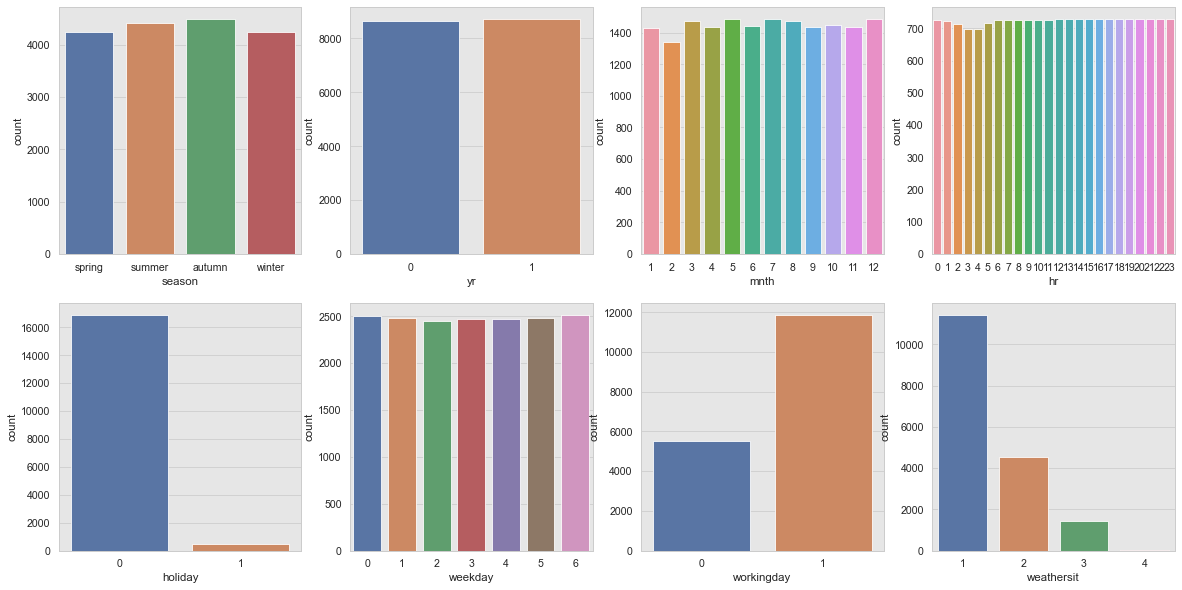

In [32]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(data_categorical, ax.flatten()):
  sns.countplot(x = variable, data = data_categorical, ax = subplot)

**Висновки з 5-7 завдання (детальні)**



5. виділив змінні("season", "yr", "mnth", "hr", "holiday", "weekday", "workingday", "weathersit"), які вважаю категоріальними, в окремий датасет.
6. перетворив змінну в числову шкалу, перевірив результат
7. побудував графіки по категоріальним змінним. з них ми можемо побачити, як часто якесь значення змінної трампяється (кількість).



#Аналіз числових змінних

**Завдання 8** виділити числові змінні в окремий датасет

In [33]:
data_numerical = pd.read_csv("motorbike_ambulance_calls.csv", usecols=["temp","atemp","hum","windspeed"])
print(data_numerical)

       temp   atemp   hum  windspeed
0      0.24  0.2879  0.81     0.0000
1      0.22  0.2727  0.80     0.0000
2      0.22  0.2727  0.80     0.0000
3      0.24  0.2879  0.75     0.0000
4      0.24  0.2879  0.75     0.0000
...     ...     ...   ...        ...
17374  0.26  0.2576  0.60     0.1642
17375  0.26  0.2576  0.60     0.1642
17376  0.26  0.2576  0.60     0.1642
17377  0.26  0.2727  0.56     0.1343
17378  0.26  0.2727  0.65     0.1343

[17379 rows x 4 columns]


**Завдання 9** побудуйте гістограми розподілу по всім числовим змінним

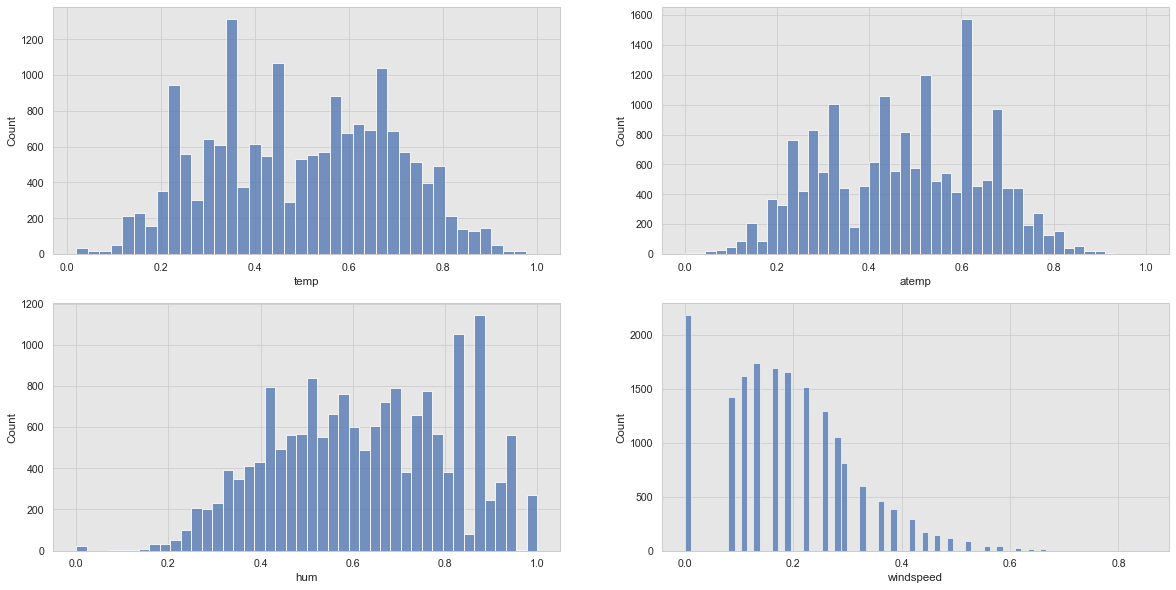

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
for variable, subplot in zip(data_numerical, ax.flatten()):
  sns.histplot(x = variable, data = data_numerical, ax = subplot)

**Завдання 10** побудуйте гістограму розподілу цільової змінної та розрахуйте коефіціент нахилу

1.2774116037490577


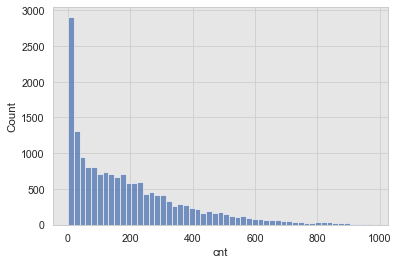

In [35]:
sns.histplot(x = "cnt", data = data)
print(data.cnt.skew())


**Висновки з 8-10 завдання (детальні)**


8. виділив змінні в окремий датасет.
9. побудував гістограми, з яких видно як часто у нас трапляється те чи інше значення змінної у нашому датасеті, кількість.
10. у нас важкий правий хвіст розподілу (skew>0)



#Аналіз взаємозв'язків між числовими і категоріальними змінними

**Завдання 11** побудуйте графіки співвідношення `scatterplot` між всіма числовими змінними і цільовою змінною `cnt`

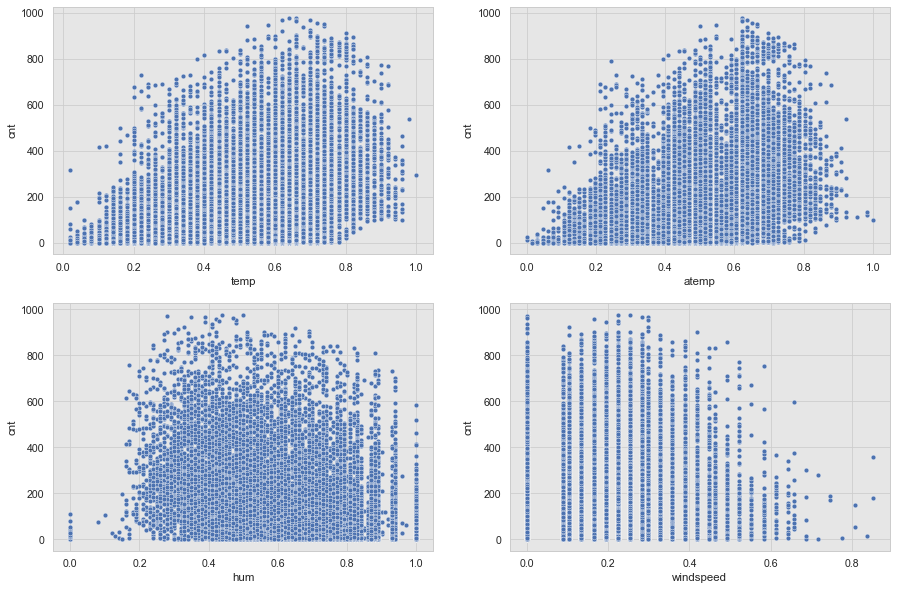

In [36]:
fig, ax = plt.subplots(2,2, figsize=(15, 10))
for variable, subplot in zip(data_numerical, ax.flatten()):
  sns.scatterplot(x = variable, y = 'cnt', data = data, ax = subplot)

**Завдання 12** побудуйте графіки співвідношення `boxplot`[boxplot](https://matplotlib.org/stable/gallery/statistics/boxplot_demo.html) між категоріальними змінними і цільовою змінною `cnt`.

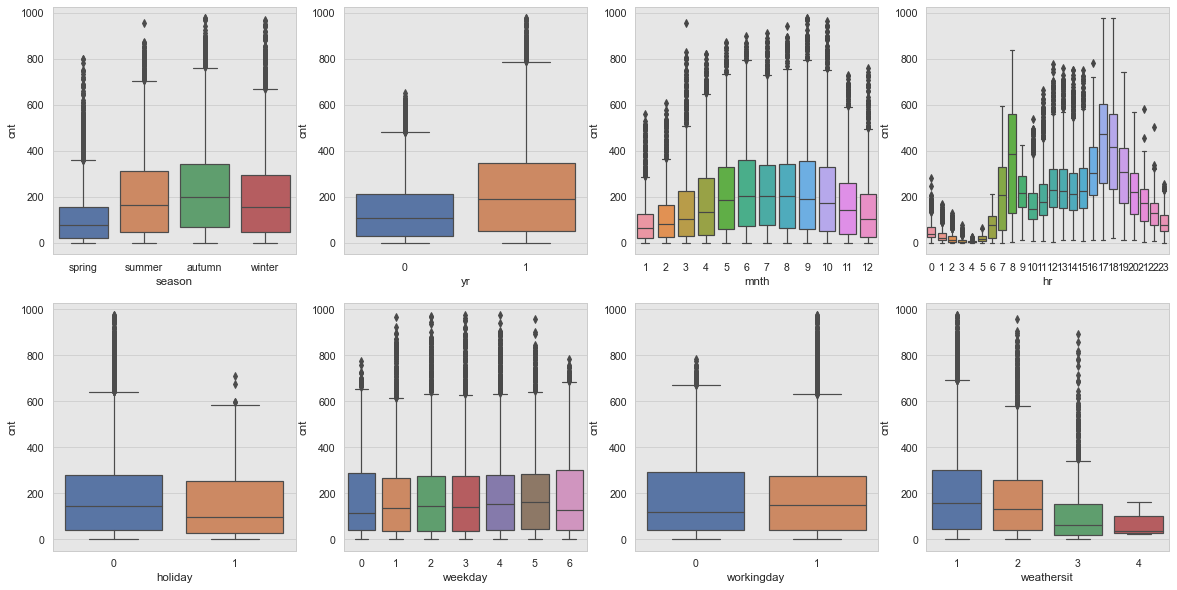

In [37]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for var, subplot in zip(data_categorical, ax.flatten()):
  sns.boxplot(x = var, y = 'cnt', data = data, ax = subplot)

**Висновки з 11-12 завдання (детальні)**



1.   Можемо побачити, залежності змінних від cnt. На різних графіках різні пропуски значень і відхилення.
2. У більшості у нас важкий правий хвіст розподілу.



**Завдання 13** Побудувати матрицю кореляції:  

1.   Вирахувати кореляційні коефіціенти для набору данних за методом Пірсона
2.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти  
3.   Вирахувати кореляційні коефіціенти для набору данних за методом Спірмана
4.   Відобразити отриману матрицю коефіціентів у вигляді теплокарти

5. Описати отримані результати, спираючись на значення коефіціентів кореляції та пояснити в чому відмінність обраних методів.

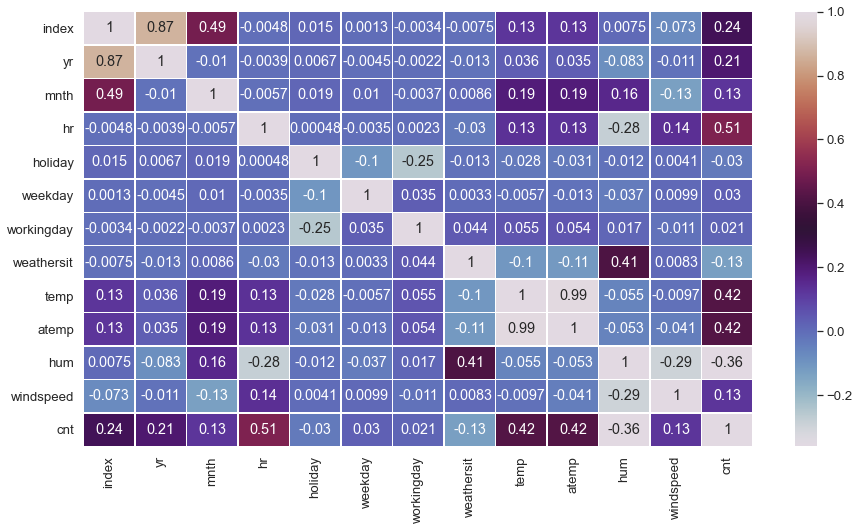

In [38]:
coef = data.corr(method = "spearman")
plt.rcParams["figure.figsize"] = (15,8)
sns.set(font_scale=1.2)
sns.heatmap(coef, annot=True, linewidths=.5 ,cmap = "twilight")
plt.show()

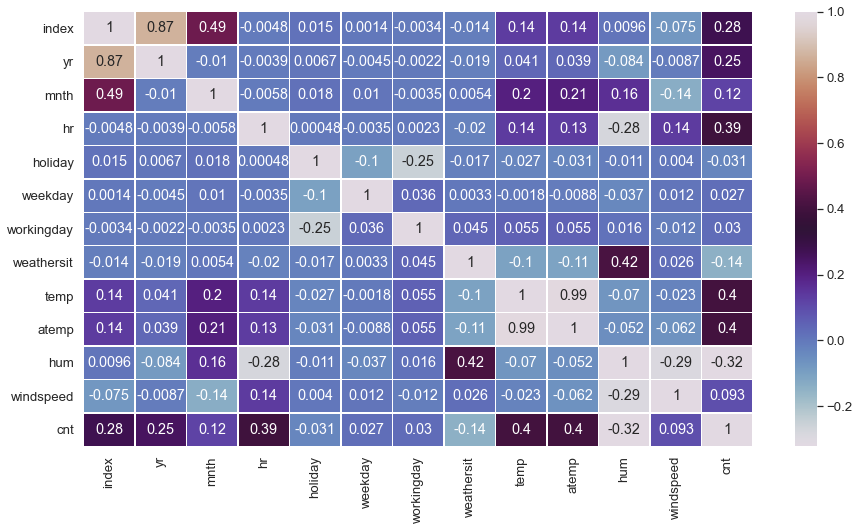

In [39]:
# data = data.drop({'atemp', 'index'}, axis=1)
coef = data.corr(method = "pearson")
plt.rcParams["figure.figsize"] = (15,8)
sns.set(font_scale=1.2)
sns.heatmap(coef, annot=True, linewidths=.5 ,cmap = "twilight")
plt.show()

Матриці кореляцій відрізняються мінімально. Найменше корелює hum i hr, workingday i holiday, windspeed i hum. Найбільше - temp i atemp.

**Завдання 14** 
1. побудувати модель лінійної регресії:
2. видалити змінні, які НЕ є релевантними;

3. поділити вибірку на `train`, `test` та `validation` в пропорції `70/30`;  

4. провести навчання моделі лінійної регресії;

1. Для подальшої роботи з моделями для кожної категоріальної змінної ми створимо фіктивні змінні, щоб уникнути неправильного порядку категорій. [get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

In [66]:
def get_dummies(df: pd.DataFrame):
    features = pd.concat([df,
                      # example:
                            pd.get_dummies(df['season'], prefix='season'),
                            pd.get_dummies(df['mnth'], prefix='mnth'),
                            pd.get_dummies(df['weekday'], prefix='weekday'),
                            pd.get_dummies(df['hr'], prefix='hr'),
                            pd.get_dummies(df['weathersit'], prefix='weathersit')
                      ], axis = 1)
    features = features.drop(['season',
                              'mnth', 
                              'weekday', 
                              'weathersit'
                             ], axis = 1)
    return features

In [67]:
features = get_dummies(data)

2. На основі змінної часу створіть нову змінну, яка відповідатиме за день і ніч.

In [68]:
features['night_hours'] = np.where((features['hr'] >= 6) & (features['hr'] < 24), 0, 1)
features = features.drop('hr', axis = 1)

**Модель лінійної регрессії  

[train_linear_model](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Після отримання фіктивних змінних потрібно видалити по одній з кожної категорії, щоб запобігти мультиколінеарності. Також видаляємо ще два атрибути `date` та `atemp` - поясніть чому?

In [69]:
features_lr = features.drop(['season_spring', 'mnth_4', 'weekday_0', 'weathersit_1', 'hr_0','atemp', 'date'], axis = 1)
features_lr.columns

Index(['index', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'cnt', 'season_autumn', 'season_summer', 'season_winter', 'mnth_1',
       'mnth_2', 'mnth_3', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
       'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12',
       'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
       'hr_21', 'hr_22', 'hr_23', 'weathersit_2', 'weathersit_3',
       'weathersit_4', 'night_hours'],
      dtype='object')

In [70]:
def get_train_data(df: pd.DataFrame, target:str, test_size:float):
    X = df
    y = df.pop(target)
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=42, shuffle = True)
    return X_train, X_test, y_train, y_test

In [71]:
X_train, X_test, y_train, y_test = get_train_data(features_lr, 'cnt', 0.3)

In [72]:
def train_linear_model(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

model = train_linear_model(X_train, y_train)

In [73]:
# predict
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# scores
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 10448.098, test: 10101.710
R^2 train: 0.688, test: 0.680


Оскільки в нашій моделі є багато незалежних змінних, ми не можемо відобразити їх залежність у двовимірному просторі, але ми можемо побудувати графік взаємозв'язку між залишками моделі та передбачуваними значеннями, що також допоможе нам оцінити якість моделі.

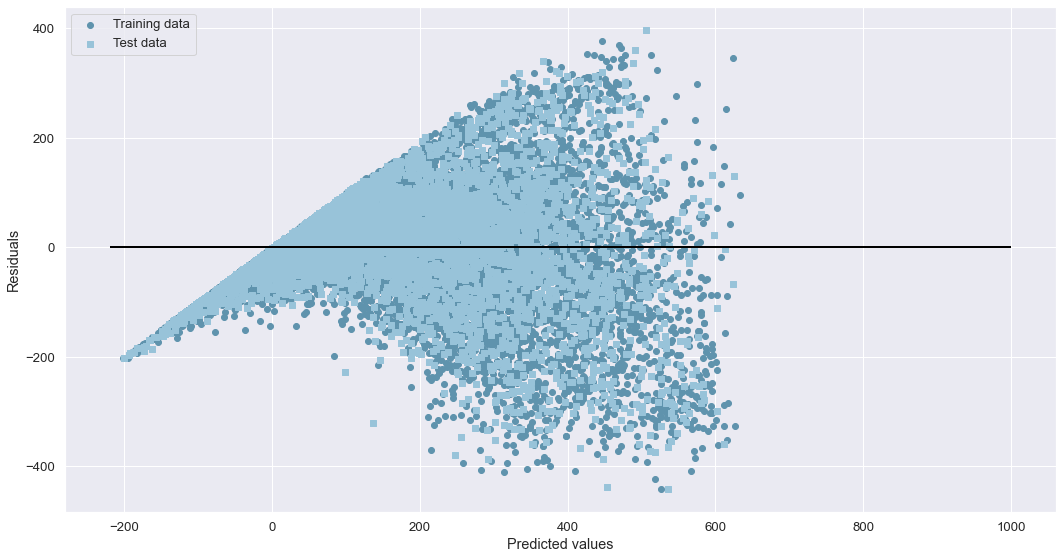

In [74]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-220, xmax=1000, lw=2, color='#000000')
plt.tight_layout()

**Висновки з завдання (детальні)**



1. Видаляємо 'atemp', бо вона дуже корелює з 'temp', а 'date', бо вже є зручніші змінні як 'season' і 'holiday'.
2. Залишки і передбачувані значиння досить схожі.
3. Передбачувані значення знаходяться на проміжку (-200, 650)

